## <center>Elements Of Data Science - F2022</center>
# <center>Week 9: Dimensionality Reduction, Feature Selection and Feature Extraction<center>
### <center>11/2/2022</center>

# TODOs

- Readings:
  - PML Chapter 6.1, Streamlining workflows with Pipelines
  - PML Chapter 8: Applying Machine Learning to Sentiment Analysis
<br>
<br>
- HW 2, Due **Fri Nov 4th, 11:59pm ET**
- Quiz 9, Due **Tues Nov 8th, 11:59pm ET**
- HW3 Out Friday, due Nov 18th
<br>

# Quiz 7 Notes

- Be careful which dataset you're training/evaluating on: X_train vs X_test

# Today

- **Joining Datasets**
- **Dimensionality Reduction**
  - **Feature Selection**
     - Linear Model with LASSO
     - Tree Based Models Feature Importance
     - Univariate Tests
     - Recursive Feature Selection
  - **Aside: Adjusted $R^2$**

  - **Feature Extraction**
     - PCA
- **Example: Image Recognition Using PCA** 

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_clients = pd.DataFrame([[102,'Mikel','Rouse',1002],
                   [103,'Laura','Gibson',1003],
                   [104,None,'Reeves',1003],
                   [105,'Scott','Payseur',1004]],columns=['client_id', 'firstname', 'lastname', 'home_address_id'])


df_addresses = pd.DataFrame([[1002,'1 First Ave.'],[1003,'2 Second Ave.'],[1005,'3 Third Ave.']],
                         columns=['address_id','address'])

# Joing Datasets

- often have two sets of data we need to join together

In [3]:
df_flower_name_orig = pd.DataFrame([[1001,'iris'],[1002,'rose']],
                                   columns=['flower_id','name'])

df_flower_price_orig = pd.DataFrame([[1002,3.99],[1003,2.25]],
                                    columns=['flower_id','price'])

In [4]:
display(df_flower_name_orig)
display(df_flower_price_orig)

,flower_id,name
0,1001,iris
1,1002,rose


,flower_id,price
0,1002,3.99
1,1003,2.25


# Joing Datasets On Index

- easiest way to join Pandas DataFrames is on row index label
- may need to set the index from a column using `.set_index()`

In [5]:
df_flower_name_orig

,flower_id,name
0,1001,iris
1,1002,rose


In [6]:
df_flower_name = df_flower_name_orig.set_index('flower_id') # note: inplace=False, drop=True by default
df_flower_name

,name
flower_id,
1001,iris
1002,rose


In [7]:
df_flower_price = df_flower_price_orig.set_index('flower_id')
df_flower_price

,price
flower_id,
1002,3.99
1003,2.25


# Joining Datasets in Pandas On Index Using `df.join()`

In [8]:
display(df_flower_name)
display(df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [9]:
df_flower_name.join(df_flower_price)

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99


- by default, this is a 'Left Join'

### Join Types: Left Join
<div align="center"><img src="images/join_left.png" width="300px"></div>

In [10]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [11]:
df_flower_name.join(df_flower_price,how="left") # default for df.join() is left join

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99


### Join Types: Right Join
<div align="center"><img src="images/join_right.png" width="300px"></div>

In [12]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [13]:
df_flower_name.join(df_flower_price,how='right')

,name,price
flower_id,,
1002,rose,3.99
1003,NaN,2.25


### Join Types: Inner Join
<div align="center"><img src="images/join_inner.png" width="300px"></div>

In [14]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [15]:
df_flower_name.join(df_flower_price,how='inner')

,name,price
flower_id,,
1002,rose,3.99


### Join Types: Outer Join
<div align="center"><img src="images/join_outer.png" width="300px"></div>

In [16]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [17]:
df_flower_name.join(df_flower_price,how='outer')

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99
1003,NaN,2.25


# Setting the Index When Reading in Data

- instead of using `.set_index()`, can specify `index_col=`on `.read` functions


In [18]:
# this csv has column for purchase_id
pd.read_csv('../data/flowershop_data_with_dups.csv'
           ).head(2)


,purchase_id,lastname,purchase_date,stars,price,favorite_flower
0,1000,PERKINS,2017-04-08,5,19.599886,iris
1,1001,ROBINSON,2017-01-01,5,37.983904,NaN


In [19]:
# can set the index when reading in the csv
pd.read_csv('../data/flowershop_data_with_dups.csv',
            index_col='purchase_id'                  # set the index column when reading/loading data
           ).head(2)


,lastname,purchase_date,stars,price,favorite_flower
purchase_id,,,,,
1000,PERKINS,2017-04-08,5,19.599886,iris
1001,ROBINSON,2017-01-01,5,37.983904,NaN


# Joining on the Index using `.join()`

In [20]:
# imagine that 'name' is a categorical variable
df_flower_name[['name']]

,name
flower_id,
1001,iris
1002,rose


In [21]:
# converting categorical to one-hot using get_dummies
pd.get_dummies(df_flower_name['name'],prefix='flower_name')

,flower_name_iris,flower_name_rose
flower_id,,
1001,1,0
1002,0,1


In [22]:
# can join back using the default index
df_flower_name[['name']].join(pd.get_dummies(df_flower_name['name'],prefix='flower_name'))

,name,flower_name_iris,flower_name_rose
flower_id,,,
1001,iris,1,0
1002,rose,0,1


# Join on Columns Instead of Index using `pd.merge()`

- to do more complicated joins, use `pd.merge()`

In [23]:
# using the dataframes before setting index using .set_index()
pd.merge(df_flower_name_orig,
         df_flower_price_orig, 
         left_on='flower_id',
         right_on='flower_id') # what is the default join for merge?

,flower_id,name,price
0,1002,rose,3.99


In [24]:
# if both id columns have the same name, can just use "on="
pd.merge(df_flower_name_orig,
         df_flower_price_orig,
         on='flower_id',
         how='outer') 

,flower_id,name,price
0,1001,iris,NaN
1,1002,rose,3.99
2,1003,NaN,2.25


# Joining Datasets Review

- Use `.join()` when you can, joining on Pandas DataFrame row index labels
- May need to set the dataframe row index labels
 - `index_col=` when creating the DataFrame or
 - `.set_index()` after DataFrame creation
- Know the different general join types: Left, Right, Inner, Outer
- Use `pd.merge()` when you need something more complex than joining on row index

<br>
<br>

# <center>Questions about joining datasets?</center>
<br>
<br>


<br>
<br>

# <center>Dimensionality Reduction</center>
<br>
<br>

# Recall: Methods for Avoiding Overfitting
<br>

- Collect additional examples
- Use a simple model
- Regularization
- **Reduce the dimensions of our data: Dimensionality Reduction**

# Dimensionality Reduction
<br>

- Reasons to reduce the number of features:
 - improve *model performance* (reduce complexity to reduce chance of overfitting)
 - improve *speed performance* (reduce number of calculations)
 - *interpretation* (which features are most important?)
<br>
<br>

- **Feature Selection**
 - choose a subset of original features
<br>
<br>
- **Feature Extraction**
 - combine/transform features to generate a new feature space

# Load Binary Wine Classification

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()

X_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
y_wine = wine.target

# reduce to binary classification
X_wine = X_wine.iloc[y_wine < 2]
y_wine = y_wine[y_wine < 2]

X_train,X_test,y_train,y_test = train_test_split(X_wine,y_wine,stratify=y_wine,random_state=0)

wine_feature_names = X_wine.columns.values
wine_feature_names

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [26]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0


# Need to Standardize Features

In [27]:
X_train.agg(['mean','std']).transpose().round(1)

,mean,std
alcohol,13.0,0.9
malic_acid,2.0,0.9
ash,2.4,0.3
alcalinity_of_ash,19.1,3.7
magnesium,99.1,15.0
total_phenols,2.5,0.5
flavanoids,2.5,0.8
nonflavanoid_phenols,0.3,0.1
proanthocyanins,1.8,0.6
color_intensity,4.2,1.7


# Standardize Features

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_zscore = ss.fit_transform(X_train)
X_train_zscore = pd.DataFrame(X_train_zscore, columns=wine_feature_names)

X_test_zscore = ss.transform(X_test)

In [29]:
X_train_zscore.agg(['mean','std']).T.round(1)

,mean,std
alcohol,-0.0,1.0
malic_acid,-0.0,1.0
ash,0.0,1.0
alcalinity_of_ash,-0.0,1.0
magnesium,0.0,1.0
total_phenols,0.0,1.0
flavanoids,0.0,1.0
nonflavanoid_phenols,-0.0,1.0
proanthocyanins,0.0,1.0
color_intensity,0.0,1.0


# Recall: Predicting vs Transforming with Train/Test Split
<br>
- When transforming data, fit on the training set, transform both train and test
<br>
<br>

<div align="center"><img src="images/transformation_pipeline.png" width="900px"></div>

From PML

# Recall: Predicting vs Transforming with Train/Test Split
<br>
- When performing prediction, train on the training set, evaluate on the test set
<br>

<div align="center"><img src="images/modelpredict_pipeline.png" width="500px"></div>

From PML

# Feature Selection
<br>

- Select a subset of features
- Based on how much they contribute to predicting the target 'y'

- From a Model
    - Linear Model with LASSO Regularization
    - Tree Based Models Feature Importance
- Univariate Tests
- Recursive Feature Selection

# Feature Selection: LASSO (L1)

- LASSO or $\ell_1$ or `l1` regularization drives the coefficient of uninformative features to 0

In [30]:
from sklearn.linear_model import LogisticRegression

# First, without regularization
#   C is the inverse regularization strength: higher means less regularization
logr = LogisticRegression(penalty="none", solver="lbfgs", random_state=0)
logr.fit(X_train_zscore, y_train)
logr.coef_[0].round(2)

array([ -8.14,  -4.41,  -8.11,  11.54,  -2.72,   2.24,  -3.52,   1.05,
         0.91,  -1.55,   0.2 ,  -3.87, -14.43])

In [31]:
pd.Series(logr.coef_[0],index=wine_feature_names).sort_values(ascending=False).round(2)

alcalinity_of_ash               11.54
total_phenols                    2.24
nonflavanoid_phenols             1.05
proanthocyanins                  0.91
hue                              0.20
color_intensity                 -1.55
magnesium                       -2.72
flavanoids                      -3.52
od280/od315_of_diluted_wines    -3.87
malic_acid                      -4.41
ash                             -8.11
alcohol                         -8.14
proline                        -14.43
dtype: float64

# Feature Selection: LASSO (L1) Cont.

In [32]:
# Now with LASSO
logr_l1 = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=0)
logr_l1.fit(X_train_zscore, y_train)

pd.Series(logr_l1.coef_[0],index=wine_feature_names).sort_values(ascending=False).round(5)

malic_acid                      0.00000
ash                             0.00000
alcalinity_of_ash               0.00000
magnesium                       0.00000
total_phenols                   0.00000
flavanoids                      0.00000
nonflavanoid_phenols            0.00000
proanthocyanins                 0.00000
color_intensity                 0.00000
hue                             0.00000
od280/od315_of_diluted_wines    0.00000
alcohol                        -0.66710
proline                        -1.37284
dtype: float64

In [33]:
# which columns were kept?
wine_feature_names[logr_l1.coef_[0] != 0]

array(['alcohol', 'proline'], dtype=object)

# Feature Selection: Tree Based Model Feature Importance

- Trees choose questions based on removing impurity
- We can rank the feature based on how much impurity they remove

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0).fit(X_train_zscore,y_train)
rf.feature_importances_.round(3) # (normalized) total reduction of function measuring impurity

array([0.225, 0.026, 0.021, 0.036, 0.054, 0.038, 0.102, 0.011, 0.004,
       0.167, 0.008, 0.015, 0.293])

In [35]:
rf_feature_importances = pd.Series(rf.feature_importances_,index=wine_feature_names)
rf_feature_importances.sort_values(ascending=False).round(3)

proline                         0.293
alcohol                         0.225
color_intensity                 0.167
flavanoids                      0.102
magnesium                       0.054
total_phenols                   0.038
alcalinity_of_ash               0.036
malic_acid                      0.026
ash                             0.021
od280/od315_of_diluted_wines    0.015
nonflavanoid_phenols            0.011
hue                             0.008
proanthocyanins                 0.004
dtype: float64

# Feature Selection: Tree Based Model Feature Importance

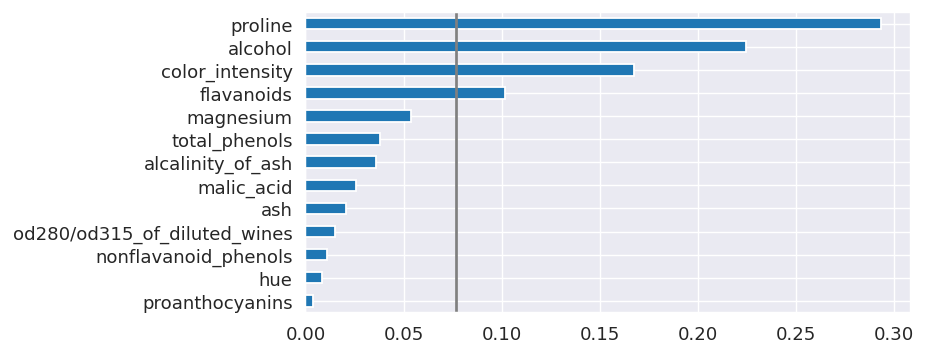

In [36]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=130)
rf_feature_importances.sort_values().plot.barh(ax=ax);
ax.axvline(rf_feature_importances.mean(),color='gray');

- Which of these features should we keep? 
 - Elbow method
 - Threshold at mean

# Feature Selection: SelectFromModel

In [37]:
from sklearn.feature_selection import SelectFromModel

sfm_lr = SelectFromModel(logr_l1,
                         threshold=None, # if model uses l1 regularization: abs val > 1e-5, otherwise mean
                         prefit=True,    # don't need to refit, but may give warnings about missing feature manes
                        )

sfm_lr.get_support() # boolean mask of features selected

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [38]:
wine_feature_names[sfm_lr.get_support()]

array(['alcohol', 'proline'], dtype=object)

In [39]:
X_train_subset = sfm_lr.transform(X_train_zscore)
X_train_subset.shape

/home/bgibson/anaconda3/envs/eods-f22/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(97, 2)

In [40]:
X_train_subset[:3].round(3) # note that this is no longer a dataframe

array([[-0.903, -0.853],
       [-1.58 , -0.936],
       [ 0.871,  1.334]])

# Feature Selection: SelectFromModel Cont.

In [41]:
sfm_rf = SelectFromModel(RandomForestClassifier(),
                         threshold='mean',   # return all features with value greater than the mean (default)
                         prefit=False        # will refit (default)
                        ).fit(X_train_zscore,y_train)

wine_feature_names[sfm_rf.get_support()]

array(['alcohol', 'magnesium', 'flavanoids', 'color_intensity', 'proline'],
      dtype=object)

In [42]:
sfm_rf.estimator_.feature_importances_.mean().round(3)

0.077

In [43]:
sfm_rf_feature_importances = pd.Series(sfm_rf.estimator_.feature_importances_,index=wine_feature_names)
sfm_rf_feature_importances.sort_values(ascending=False).round(3)

alcohol                         0.266
proline                         0.263
color_intensity                 0.114
flavanoids                      0.090
magnesium                       0.079
total_phenols                   0.058
alcalinity_of_ash               0.035
malic_acid                      0.023
ash                             0.019
proanthocyanins                 0.016
hue                             0.015
od280/od315_of_diluted_wines    0.014
nonflavanoid_phenols            0.008
dtype: float64

# Feature Selection: Univariate Tests

- Perform statistical test on each feature **independent of all others**
  - Rank and select top k features
  - sklearn: `SelectKBest`
  - requires a scoring function
<br>

- Example: `f_classif`
  - F-test
  - estimates the degree of linear dependency between feature x and target y

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

# select 2 best features
kbest = SelectKBest(score_func=f_classif, # default,
                    k=3                   # how many features to keep
                   ).fit(X_train, y_train)
wine_feature_names[kbest.get_support()]

array(['alcohol', 'color_intensity', 'proline'], dtype=object)

# Feature Selection: Recursive Feature Elimination

- Would like to test all possible combinations of features
- Likely prohibitively expensive/time-consuming
- Instead recursively select smaller subsets of features
- Requires a model that assigns weights or importance to features

In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(penalty='none',max_iter=1000), # turn off regularization
          n_features_to_select=3,                           # number of feature to retain
          step=1,                                           # number of features to eliminate each round
         ).fit(X_train_zscore,y_train)

wine_feature_names[rfe.get_support()]

array(['alcohol', 'flavanoids', 'proline'], dtype=object)

# Feature Selection: Other Methods

- by **Variance**
 - eliminate columns where all rows have the same (or almost all the same) value
- **Sequential Feature Selection**
 - greedy algorithm similar to Recursive Feature Elimination
 - uses performance metric (eg accuracy) instead of weights, importances
 - via `mlxtend`
- **Exaustive Feature Selection**
 - evaluate all possible feature combinations
 - uses performance metric (eg accuracy) instead of weights, importances
 - via `mlxtend`
- Other **Univariate tests**
 - `f_regression`, F-test for regression task
 - `mutual_info_classif` and `_regression`
 - `chi2`, for classification, requires non-negative values



<br>
<br>

# <center>Questions on Feature Selection?</center>
<br>
<br>

# When changing number of features: Use Adjusted $R^2$

- Adding features guarantees an increase in $R^2$
- $R^2$ describes the proportion of explained variance
- Additional features explain more variance

$$R_{adj}^2 = 1-(1-R^2)\frac{n-1}{n-m-1}$$

- where $n$ is the number of observations, $m$ is the number of features

In [46]:
def adj_r2(model,X,y):
    n,m = X.shape
    return 1-(1-model.score(X,y))*(n-1)/(n-m-1)

# Changing number of features: Use Adjusted $R^2$ Cont.

In [47]:
from sklearn.linear_model import LinearRegression

X_r = X_train_zscore.loc[:,wine_feature_names != 'alcohol'] # get all features except alchohol
y_r = X_train_zscore.loc[:,'alcohol']  # predict alcohol from other features

lr = LinearRegression()
print('R2 with 3 features   :', lr.fit(X_r.iloc[:,:3],y_r).score(X_r.iloc[:,:3],y_r).round(2))
print('R2 with all features :', lr.fit(X_r.iloc[:,:],y_r).score(X_r.iloc[:,:],y_r).round(2))

R2 with 3 features   : 0.37
R2 with all features : 0.67


Is this due to a better model or just adding features?

In [48]:
print('Adj R2 with 3 features   :',adj_r2(lr.fit(X_r.iloc[:,:3],y_r),X_r.iloc[:,:3],y_r).round(2))
print('Adj R2 with all features :',adj_r2(lr.fit(X_r.iloc[:,:],y_r),X_r.iloc[:,:],y_r).round(2))

Adj R2 with 3 features   : 0.35
Adj R2 with all features : 0.62


- Now we know the increase is due to a better model and not just adding features

# Changing number of features: Use Adjusted $R^2$ Cont.

In [49]:
from statsmodels.api import OLS

model = OLS(y_r,X_r).fit()
print(model.rsquared_adj.round(3))
model.summary()

0.621


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                alcohol   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                              14.23
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                    1.06e-15
Time:                        17:21:35   Log-Likelihood:                         -84.207
No. Observations:                  97   AIC:                                      192.4
Df Residuals:                      85   BIC:                                      223.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
malic_acid                       0.1823      0.074      2.449      0.016       0.034       0.330
ash                             -0.0314      0.104     -0.302      0.764      -0.238       0.175
alcalinity_of_ash               -0.1651      0.097     -1.706      0.092      -0.357       0.027
magnesium                        0.0060      0.077      0.079      0.937      -0.146       0.158
total_phenols                    0.0701      0.126      0.555      0.580      -0.181       0.321
flavanoids                       0.0260      0.183      0.142      0.888      -0.338       0.390
nonflavanoid_phenols             0.0545      0.086      0.631      0.530      -0.117       0.226
proanthocyanins                 -0.1407      0.082     -1.717      0.090      -0.304       0.022
color_intensity                  0.3190      0.138      2.316      0.023       0.045       0.593
hue                              0.1609      0.074      2.183      0.032       0.014       0.308
od280/od315_of_diluted_wines     0.0826      0.089      0.926      0.357      -0.095       0.260
proline                          0.4105      0.124      3.323      0.001       0.165       0.656
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.555
Skew:                           0.290   Prob(JB):                        0.460
Kurtosis:                       3.221   Cond. No.                         7.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# <center>Questions re Adjusted $R^2$?</center>
<br>
<br>

# Feature Extraction

- Transform original features into new feature space
- Can be thought of as compression while maintaining relevant information
- Often used for:
 - visualization (multi-dimensional to 2-D)
 - compression (storage)
 - dimensionality reduction
 
- Popular methods:
 - **Principal Component Analysis:** Unsupervised data compression
 - Linear Discriminant Analysis: Supervised method to maximize class separation
 - Kernel PCA, etc.

# Principal Component Analysis (PCA)

- Unsupervised Learning method (ignores label)
- Idea: 
 - Directions of high variance in the data contain important information
 - Colinear features can be combined
 - Find directions of maximum variance
 - Project onto subspace with same or fewer dimensions
<br>

# Principal Component Analysis (PCA)
<br>

- How it works:
  0. first center the data (subtract the means)
  1. extract first component:
    - direction (combination of features)
    - explains maximum variance
  2. extract next component:
    - direction, orthogonal to the first (linearly independent)
    - explains max remaining variance
  3. repeat:
    - max number of possible components equals number of original dimensions

In [50]:
# function to plot a vector
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(width=3,
                    headwidth=12,
                    shrink=0,
                    color='k'
                    #arrowstyle='->',
                    #linewidth=6,
                    #shrinkA=0,shrinkB=0
                   )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data, pca vectors and pca planes
def plot_pca(df,pca,num_components=1,colors=['r','g'],fig=None):
    fig = fig or plt.figure(figsize=(14,6))
    plt.subplot2grid((2,2), (0, 0), rowspan=2)
    sns.scatterplot(x=df.columns[0],y=df.columns[1],data=df);
    plt.scatter(1,2,c='k',linewidths=5)

    for i in range(num_components):
        length = pca.explained_variance_[i]
        vector = pca.components_[i]
        slope0 = vector[1] / vector[0]
        _= plt.plot([-3,3],[slope0*-3,slope0*3],color=colors[i])
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_,pca.mean_ + v)
    plt.gca().set_aspect('equal')
    #plt.axis([-8.5, 8.5, -8.5, 8.5])
    X = pca.transform(df)
    for i in range(num_components):
        plt.subplot2grid((2,2), (i, 1))
        plt.plot([-4,4],[0,0],colors[i])
        sns.scatterplot(x=X[:,i],y=[0]*len(X));
        tmp = pd.DataFrame([[1,2]],columns=df.columns)
        plt.scatter(pca.transform(tmp)[0][i],0,color='k',linewidths=5)
        plt.axis([-4.5, 4.5, -1, 1]);
        plt.xlabel('component '+str(i))

# PCA Example

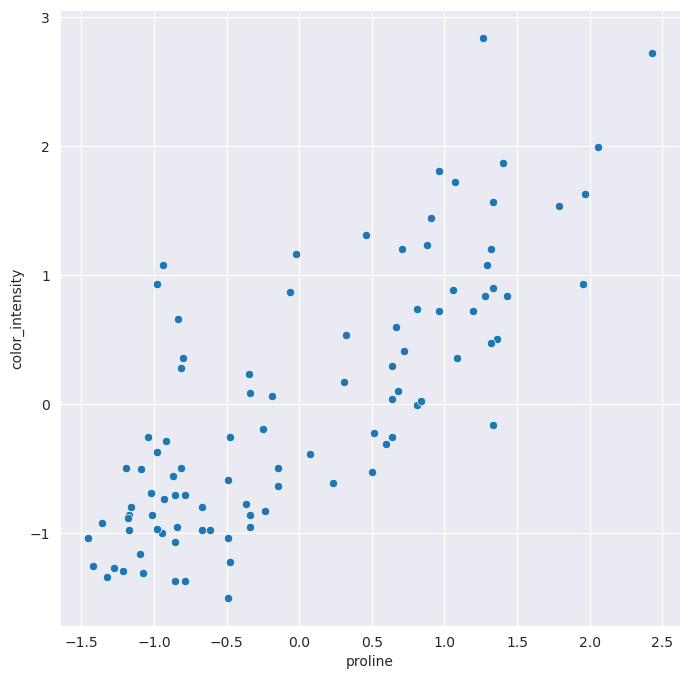

In [51]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(x='proline',y='color_intensity',data=X_train_zscore,ax=ax);

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train_zscore[['proline','color_intensity']])

# PCA Example Cont.

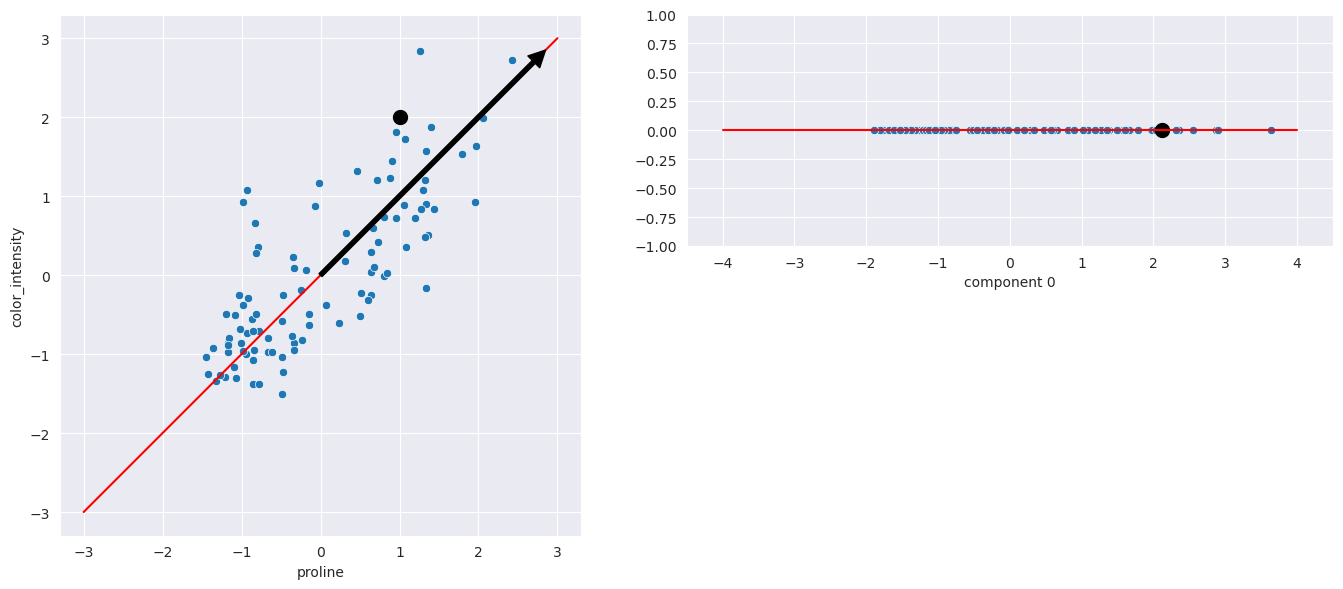

In [53]:
plot_pca(X_train_zscore[['proline','color_intensity']],pca,num_components=1)
plt.tight_layout()

# PCA Example Cont.

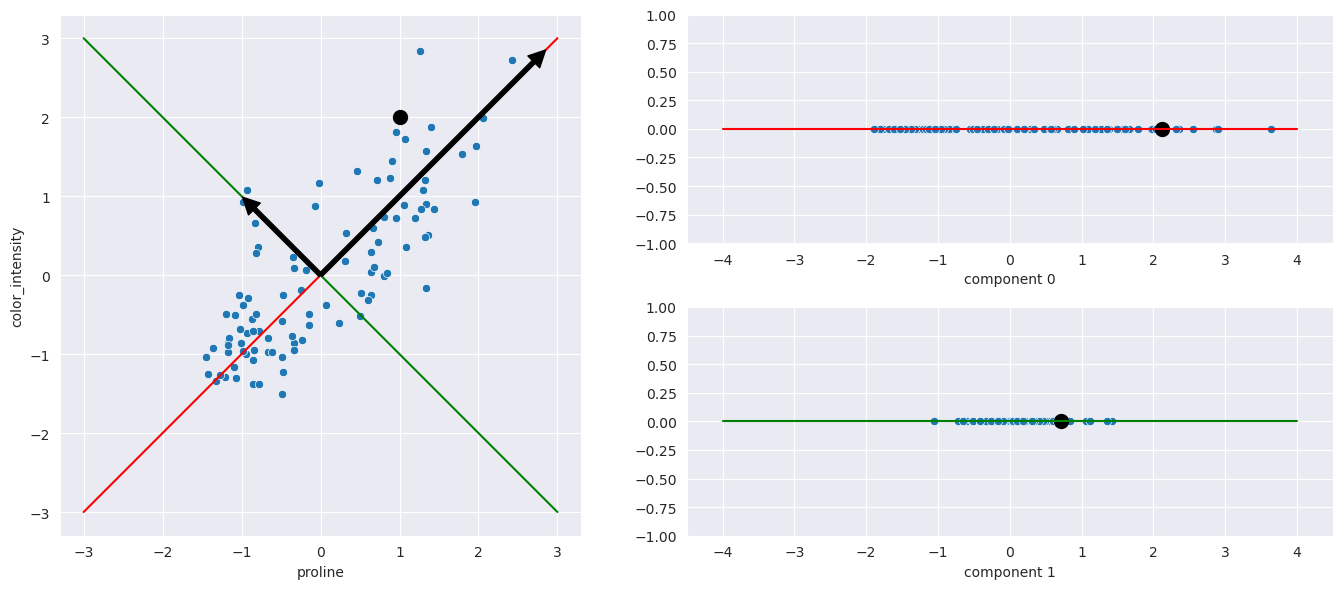

In [54]:
plot_pca(X_train_zscore[['proline','color_intensity']],pca,num_components=2)
plt.tight_layout()

# PCA in sklearn

In [55]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_zscore)

print(f'num input features: {X_train_zscore.shape[1]}')
print(f'num pca components: {pca.n_components_}')

num input features: 13
num pca components: 13


In [56]:
pca.components_[0].round(2)

array([ 0.35, -0.05,  0.16, -0.18,  0.23,  0.38,  0.4 , -0.22,  0.24,
        0.38,  0.12,  0.21,  0.39])

In [57]:
print(' + \n'.join([f'{w: 0.2f}*{f}' for f,w in zip(wine_feature_names,pca.components_[0])]))

 0.35*alcohol + 
-0.05*malic_acid + 
 0.16*ash + 
-0.18*alcalinity_of_ash + 
 0.23*magnesium + 
 0.38*total_phenols + 
 0.40*flavanoids + 
-0.22*nonflavanoid_phenols + 
 0.24*proanthocyanins + 
 0.38*color_intensity + 
 0.12*hue + 
 0.21*od280/od315_of_diluted_wines + 
 0.39*proline


# PCA: Explained Variance

- How much of the variance in the dataset is explained by each component?

explained_variance            : [4.75 1.96 1.56 1.22 0.84 0.74 0.59 0.42 0.33 0.26 0.22 0.17 0.07]
explained_variance_ratio_     : [0.36 0.15 0.12 0.09 0.06 0.06 0.05 0.03 0.03 0.02 0.02 0.01 0.01]
cumulative explained variance : [0.36 0.51 0.63 0.72 0.79 0.84 0.89 0.92 0.95 0.97 0.98 0.99 1.  ]


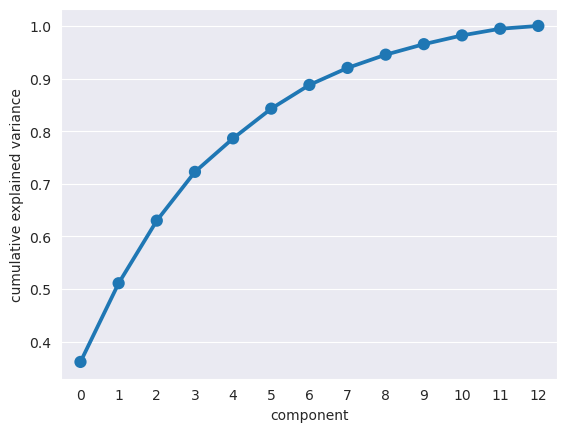

In [58]:
pca = PCA().fit(X_train_zscore)

print(f'explained_variance            : {pca.explained_variance_.round(2)}')
print(f'explained_variance_ratio_     : {pca.explained_variance_ratio_.round(2)}')
print(f'cumulative explained variance : {pca.explained_variance_ratio_.cumsum().round(2)}')
df_var = pd.DataFrame({'component':range(pca.n_components_),
                       'cumulative explained variance':pca.explained_variance_ratio_.cumsum()})
sns.pointplot(x='component',y='cumulative explained variance',data=df_var);

# Dimensionality Reduction with PCA

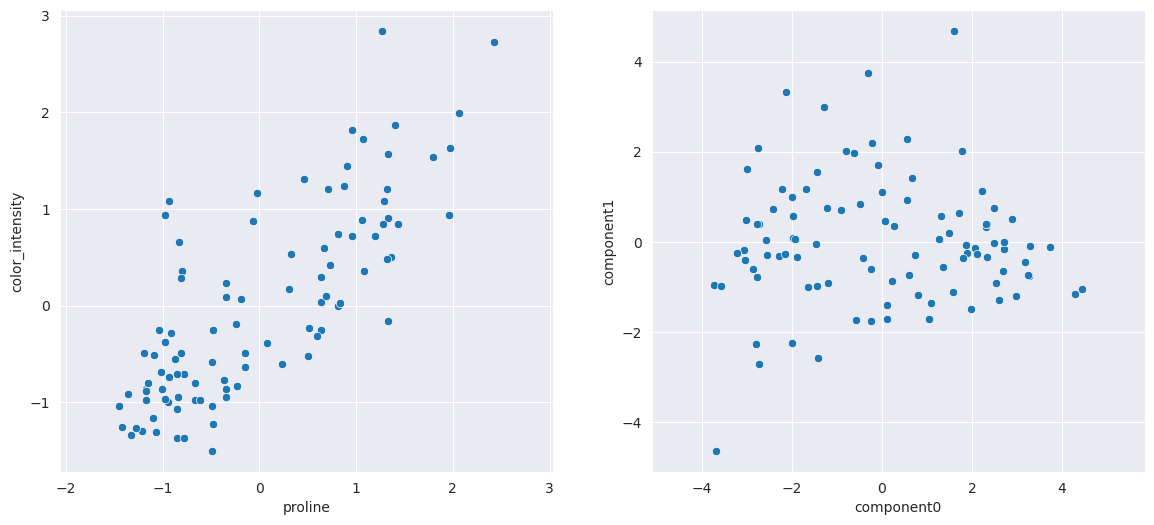

In [59]:
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_train_zscore)
X_pca = pd.DataFrame(X_pca,columns=['component0','component1'])

fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x='proline',y='color_intensity',data=X_train_zscore,ax=ax[0]);
sns.scatterplot(x='component0',y='component1',data=X_pca,ax=ax[1]);
ax[0].axis('equal');ax[1].axis('equal');

<br>
<br>

# <center>Image Recognition Example</center>
<br>
<br>

# PCA and Image Recognition

- Generally, an image is represented by a grid of pixels
- Each pixel is a square that takes a value representing a shade (usually a value between 0 and 255)
- 1024 x 1024 pixels = 1,048,576 pixels = 1 megapixel
- iPhone X11 Pro : 12 megapixels
- Color images contain three layers: red, green, blue
- ~36 million pixel values
- A very high dimensional space!
<br>

- Image classification using PCA?
 - Example based on [Faces recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py)


# Example Dataset: Labeled Faces in th Wild (LFW)
<br>

[Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

In [60]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.6)

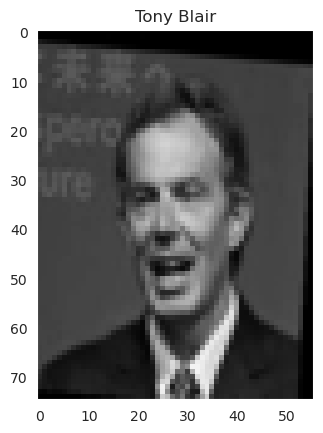

In [61]:
sns.set_style('dark')
plt.imshow(lfw_people.images[1], cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title(lfw_people.target_names[lfw_people.target[1]], size=12);

# Example Pixel Values

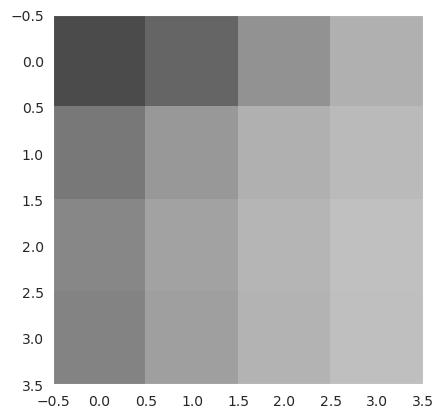

In [62]:
# sample of 3x3 set of pixels
plt.imshow(lfw_people.images[1][20:24,20:24],cmap=plt.cm.gray,vmin=0, vmax=1);

In [63]:
lfw_people.images[1][13:16,13:16].round(2)

array([[0.25, 0.24, 0.29],
       [0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25]], dtype=float32)

# Representing each Image: Flatten
<br>

- Grid as a fixed length feature vector?

In [64]:
lfw_people.images[1].shape

(75, 56)

In [65]:
x = lfw_people.images[1].reshape(1,-1)
x

array([[0.00261438, 0.00261438, 0.        , ..., 0.01830065, 0.        ,
        0.        ]], dtype=float32)

In [66]:
x.shape

(1, 4200)

What information do we lose when we do this?

# Create a Dataset

In [67]:
# get the shape of images for plotting the
n_samples, h, w = lfw_people.images.shape

# use actual pixel values, ignoring relative position
X_faces = lfw_people.data
n_features = X_faces.shape[1]

# the label to predict is the id of the person
y_faces = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# create train/test split
X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(X_faces, y_faces,
                                                                            test_size=0.25,
                                                                            stratify=y_faces,
                                                                            random_state=0)
print(f"image_size: {h}x{w}")
print("n_features: %d" % n_features)
print("n_classes : %d" % n_classes)
print(f"n_train   : {len(X_train_faces)}")
print(f"n_test    : {len(X_test_faces)}")

image_size: 75x56
n_features: 4200
n_classes : 7
n_train   : 966
n_test    : 322


# Variance explained by PCA

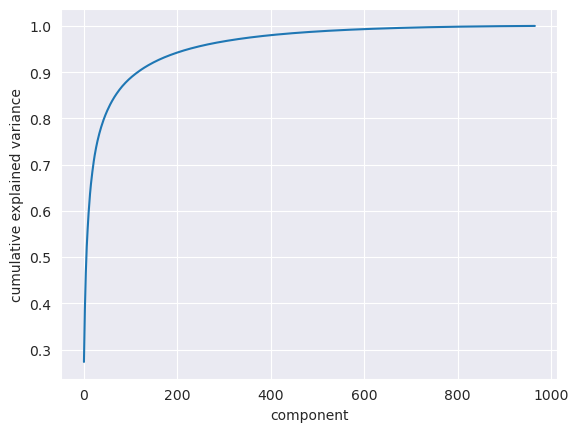

In [68]:
pca_faces = PCA().fit(X_train_faces)

df_var_faces = pd.DataFrame({'component':range(pca_faces.n_components_),
                             'cumulative explained variance':pca_faces.explained_variance_ratio_.cumsum()})
# using lineplot here instead of pointplot because of the large number of components
with sns.axes_style('darkgrid'):
    sns.lineplot(x='component',y='cumulative explained variance',data=df_var_faces);

# Compute PCA and Transform

In [69]:
# set the number of dimensions we want to retain
n_components = 200

# instantiate and fit on X_train
pca_faces = PCA(n_components=n_components,
                svd_solver='randomized',
                whiten=True).fit(X_train_faces)

# extract and reshape components into eigenfaces for plotting
eigenfaces = pca_faces.components_.reshape((n_components, h, w))

# transform the training and test set for classification
X_train_faces_pca = pca_faces.transform(X_train_faces)
X_test_faces_pca = pca_faces.transform(X_test_faces)

In [70]:
pca_faces.components_[0].round(2)

array([0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ], dtype=float32)

In [71]:
pca_faces.singular_values_.round(2)

array([255.19, 117.42, 115.07, 102.78,  91.69,  84.31,  79.27,  70.63,
        66.71,  65.5 ,  61.31,  58.95,  56.8 ,  54.46,  52.38,  49.04,
        46.8 ,  45.43,  44.75,  44.01,  42.64,  41.01,  40.44,  38.07,
        37.74,  35.97,  35.33,  34.61,  33.79,  32.88,  32.09,  31.6 ,
        31.08,  30.14,  29.7 ,  29.02,  28.72,  28.21,  27.53,  27.3 ,
        26.96,  26.69,  26.44,  25.95,  25.12,  24.88,  24.59,  24.34,
        23.93,  23.57,  23.37,  22.91,  22.77,  22.53,  22.44,  22.16,
        21.83,  21.69,  21.26,  21.01,  20.87,  20.6 ,  20.48,  20.2 ,
        19.92,  19.8 ,  19.59,  19.23,  19.12,  18.93,  18.78,  18.67,
        18.51,  18.24,  18.16,  18.05,  17.9 ,  17.74,  17.57,  17.47,
        17.33,  17.03,  16.83,  16.61,  16.52,  16.32,  16.26,  16.15,
        16.05,  15.84,  15.68,  15.67,  15.52,  15.45,  15.28,  15.13,
        15.07,  14.97,  14.89,  14.62,  14.6 ,  14.48,  14.33,  14.29,
        14.18,  14.12,  13.98,  13.96,  13.81,  13.73,  13.63,  13.56,
      

# Eigenfaces

- What if we plot the top 12 components (eigenfaces) using .reshape(h,w)?

In [72]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()

# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# Eigenfaces

- What if we plot the top 12 components (eigenfaces) using .reshape(h,w)?

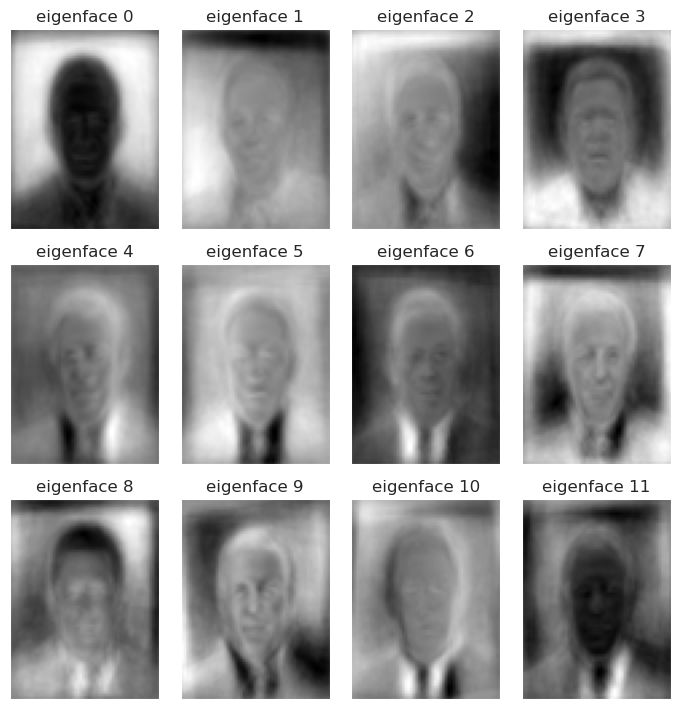

In [73]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# Train and Tune SVC

In [74]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_faces_pca = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                             params, cv=3, n_jobs=-1)
clf_faces_pca = clf_faces_pca.fit(X_train_faces_pca, y_train_faces)

CPU times: user 272 ms, sys: 124 ms, total: 396 ms
Wall time: 3.33 s


In [75]:
print(f"best_params : {clf_faces_pca.best_params_}")
print(f"best_score  : {clf_faces_pca.best_score_:0.2f}")

best_params : {'C': 1000.0, 'gamma': 0.001}
best_score  : 0.72


# Evaluate on the test set

In [76]:
from sklearn.metrics import classification_report

y_pred_pca = clf_faces_pca.predict(X_test_faces_pca)
print(classification_report(y_test_faces, y_pred_pca, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.58      0.61        19
     Colin Powell       0.74      0.73      0.74        59
  Donald Rumsfeld       0.76      0.63      0.69        30
    George W Bush       0.80      0.91      0.85       133
Gerhard Schroeder       0.77      0.63      0.69        27
      Hugo Chavez       0.64      0.50      0.56        18
       Tony Blair       0.77      0.75      0.76        36

         accuracy                           0.77       322
        macro avg       0.73      0.68      0.70       322
     weighted avg       0.76      0.77      0.76       322



# Prediction Examples

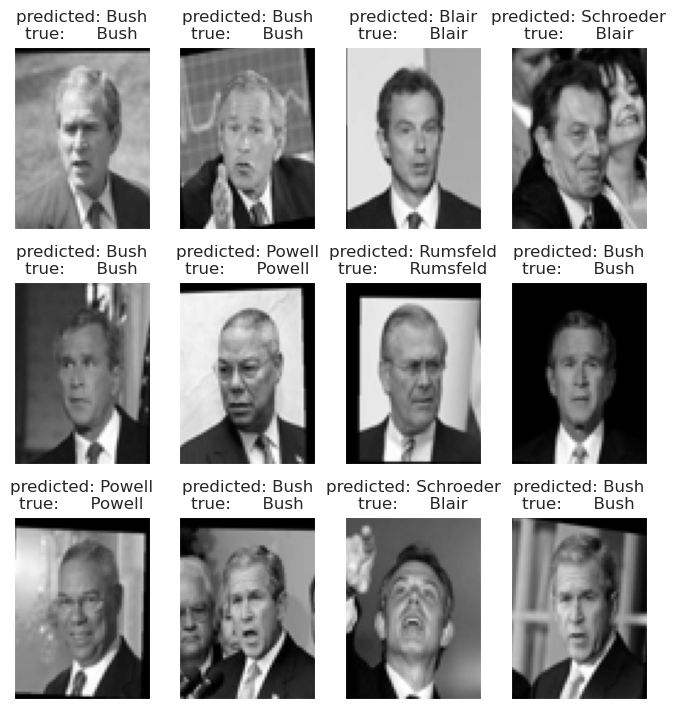

In [77]:
prediction_titles = [title(y_pred_pca, y_test_faces, target_names, i)
                     for i in range(y_pred_pca.shape[0])]

plot_gallery(X_test_faces[10:], prediction_titles[10:], h, w)
plt.tight_layout()

# Performance without PCA: Train

# Performance without PCA: Evaluate

# Other Image Recognition Methods

- With Feature Engineering and general models
 - ex: Histogram of Oriented Gradients or HOG (See [PDSH Chap 5](https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html#HOG-Features))
 - many more (See [scikit-image](https://scikit-image.org/))
<br>
<br>

<div align="center"><img src="images/cat_hog.png" width="1600px"></div>
    
<font size=3>From PDSH</font>

# Other Image Recognition Methods: Deep Neural Networks
<br>

- With Deep Neural Nets
<br>

<div align="center"><img src="images/dnn_image_recognition.png" width="800px"></div>
<br>
<br>

<font size=4>From https://www.researchgate.net/figure/Layers-and-their-abstraction-in-deep-learning-Image-recognition-as-measured-by-ImageNet_fig17_326531654</font>

# Other Image Recognition Methods: Deep Neural Networks
<br>

- With Convolutional Neural Networks [Good Example](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)
<br>
<br>

<div align="center"><img src="images/cnn.jpeg" width="1200px"></div>
<br>
<br>

<font size=3>From https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53</font>

<br>
<br>

# <center>Questions re Feature Extraction and PCA?</center>
<br>
<br>

<br>
<br>

# <center>Next time: NLP and Pipelines</center>
<br>
<br>

In [78]:
# reset style to dark_grid
sns.set_style('darkgrid')